# Context-Aware Recommender System - Dataset Analysis
## Phân tích và Tiền xử lý Dataset


In [171]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')

# Load dataset
df = pd.read_csv('cars_dataset.csv')

print(f"Dataset loaded: {len(df)} records")
print(f"Columns: {df.columns.tolist()}")


Dataset loaded: 10000 records
Columns: ['user_id', 'product_id', 'rating', 'rating_count', 'time_of_day', 'day_of_week', 'month', 'season', 'device_type', 'gender', 'category', 'brand', 'price', 'original_price', 'discount_percentage', 'product_views', 'purchase_intent', 'interaction_type', 'timestamp', 'day_name', 'is_weekend', 'hour', 'date', 'price_range', 'uid', 'iid']


## 1. Tổng quan Dataset


In [172]:
# Dataset Info
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total Records: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"Unique Users: {df['user_id'].nunique()}")
print(f"Unique Products: {df['product_id'].nunique()}")
print(f"Unique Categories: {df['category'].nunique()}")
print(f"Unique Brands: {df['brand'].nunique()}")
print(f"\nDate Range: {df['timestamp'].min()} to {df['timestamp'].max()}")

print("\n" + "="*60)
print("COLUMNS INFORMATION")
print("="*60)
print(df.info())


DATASET OVERVIEW
Total Records: 10000
Total Columns: 26
Unique Users: 200
Unique Products: 500
Unique Categories: 20
Unique Brands: 20

Date Range: 2023-01-01 00:39:03 to 2024-12-31 22:49:13

COLUMNS INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              10000 non-null  int64  
 1   product_id           10000 non-null  int64  
 2   rating               10000 non-null  float64
 3   rating_count         10000 non-null  int64  
 4   time_of_day          10000 non-null  object 
 5   day_of_week          10000 non-null  int64  
 6   month                10000 non-null  int64  
 7   season               10000 non-null  object 
 8   device_type          10000 non-null  object 
 9   gender               10000 non-null  object 
 10  category             10000 non-null  object 
 11  brand                1000

In [173]:
# Basic Statistics
print("="*60)
print("BASIC STATISTICS")
print("="*60)
print(df.describe())


BASIC STATISTICS
            user_id   product_id        rating  rating_count   day_of_week  \
count  10000.000000  10000.00000  10000.000000   10000.00000  10000.000000   
mean     100.286200    250.34330      3.987643     212.24490      3.005800   
std       58.170883    144.10782      0.747038     109.78041      2.007429   
min        1.000000      1.00000      2.000000      20.00000      0.000000   
25%       49.000000    126.00000      3.480000     117.00000      1.000000   
50%      101.000000    251.00000      4.170000     214.00000      3.000000   
75%      151.000000    375.00000      4.580000     306.00000      5.000000   
max      200.000000    500.00000      5.000000     400.00000      6.000000   

             month         price  original_price  discount_percentage  \
count  10000.00000  1.000000e+04    1.000000e+04          10000.00000   
mean       6.49630  1.367459e+06    1.656908e+06             17.48810   
std        3.42998  6.530832e+05    7.840513e+05             

In [174]:
# First few records
print("First 5 Records:")
df.head()


First 5 Records:


,user_id,product_id,rating,rating_count,time_of_day,day_of_week,month,season,device_type,gender,...,purchase_intent,interaction_type,timestamp,day_name,is_weekend,hour,date,price_range,uid,iid
0,158,55,4.26,310,night,6,1,winter,mobile,F,...,high,purchase,2023-01-01 00:39:03,Sunday,1,0,2023-01-01,Premium,157,54
1,199,56,2.91,364,night,6,1,winter,tablet,M,...,low,view,2023-01-01 02:12:09,Sunday,1,2,2023-01-01,Luxury,198,55
2,58,332,4.16,390,night,6,1,winter,mobile,F,...,high,purchase,2023-01-01 02:39:58,Sunday,1,2,2023-01-01,Premium,57,331
3,175,91,3.05,100,night,6,1,winter,mobile,F,...,medium,view,2023-01-01 02:42:08,Sunday,1,2,2023-01-01,Premium,174,90
4,30,35,2.69,278,night,6,1,winter,mobile,M,...,medium,view,2023-01-01 04:38:56,Sunday,1,4,2023-01-01,Mid,29,34


## 2. Phân tích Dữ liệu


TOP 10 CATEGORIES
category
Dress          532
Sunglasses     527
Shirt          526
Boots          525
Hat            524
Jeans          524
Coat           513
Cargo Pants    511
Jacket         510
Hoodie         508
Name: count, dtype: int64


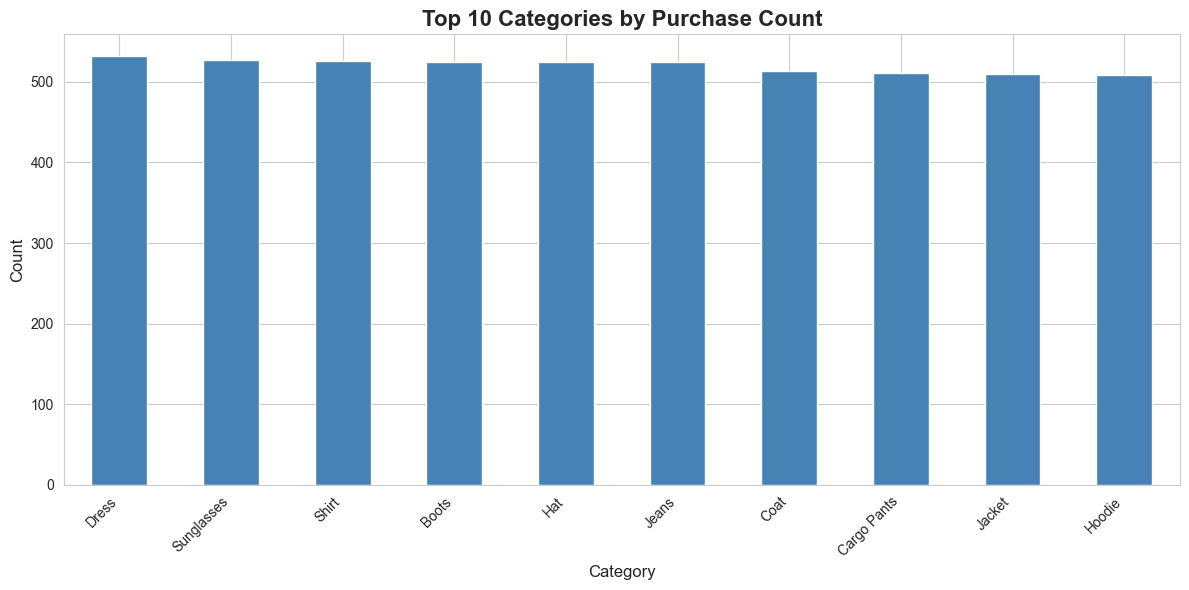

In [175]:
# Category Analysis
print("="*60)
print("TOP 10 CATEGORIES")
print("="*60)
category_counts = df['category'].value_counts().head(10)
print(category_counts)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Categories by Purchase Count', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TOP 10 BRANDS
brand
Dickies           535
Calvin Klein      532
The North Face    526
Gap               517
Bershka           514
Mango             510
Nike              509
H&M               506
Puma              504
Gucci             503
Name: count, dtype: int64


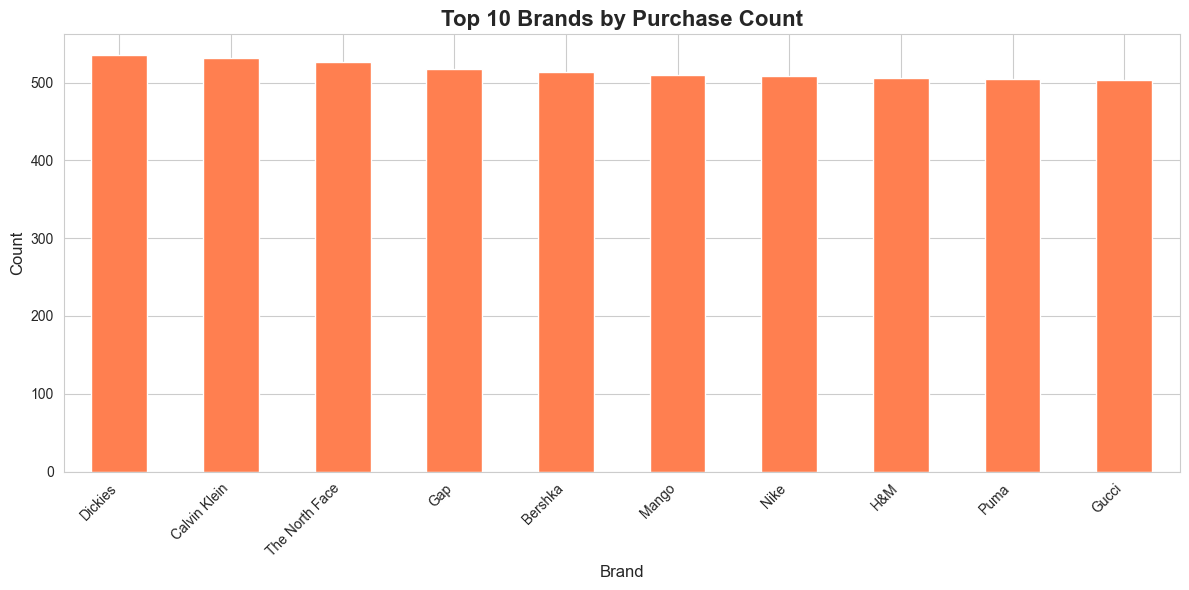

In [176]:
# Brand Analysis
print("="*60)
print("TOP 10 BRANDS")
print("="*60)
brand_counts = df['brand'].value_counts().head(10)
print(brand_counts)

plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Brands by Purchase Count', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


INTERACTION TYPES
interaction_type
cart        3345
view        3343
purchase    3312
Name: count, dtype: int64


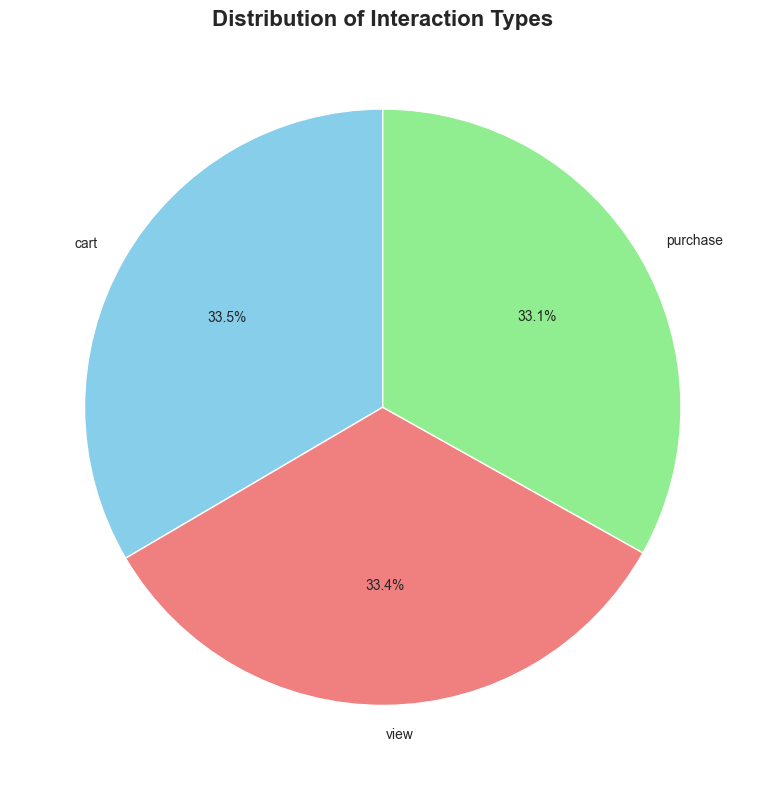

In [177]:
# Interaction Type Analysis
print("="*60)
print("INTERACTION TYPES")
print("="*60)
interaction_counts = df['interaction_type'].value_counts()
print(interaction_counts)

plt.figure(figsize=(8, 8))
interaction_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Interaction Types', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()


## 3. Phân tích Context Features


TIME OF DAY DISTRIBUTION
time_of_day
night        2536
evening      2524
morning      2491
afternoon    2449
Name: count, dtype: int64


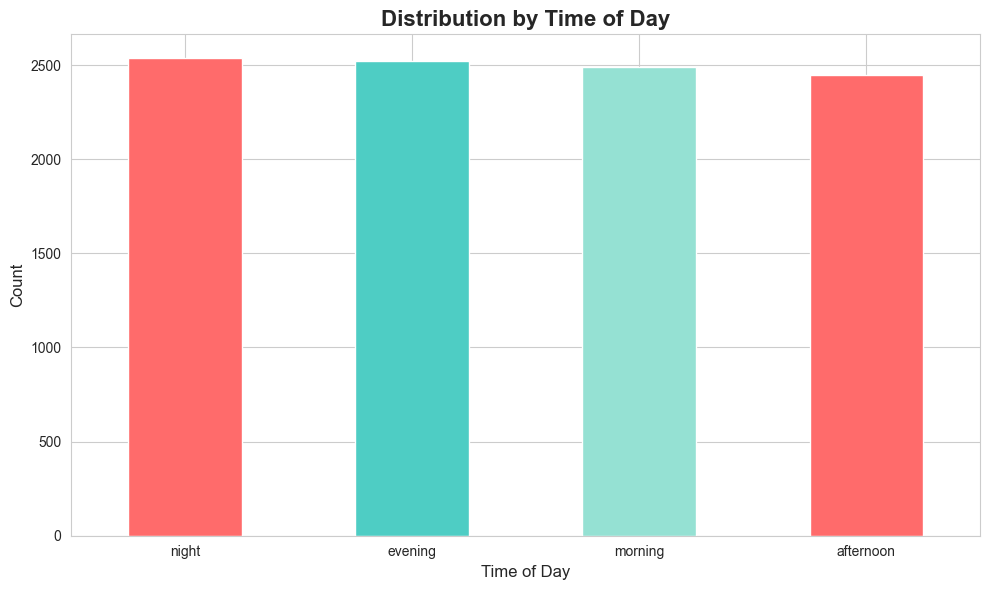

In [178]:
# Temporal Analysis - Time of Day
print("="*60)
print("TIME OF DAY DISTRIBUTION")
print("="*60)
time_dist = df['time_of_day'].value_counts()
print(time_dist)

plt.figure(figsize=(10, 6))
time_dist.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
plt.title('Distribution by Time of Day', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


DAY OF WEEK DISTRIBUTION
day_name
Monday       1436
Tuesday      1443
Wednesday    1383
Thursday     1431
Friday       1441
Saturday     1404
Sunday       1462
Name: count, dtype: int64


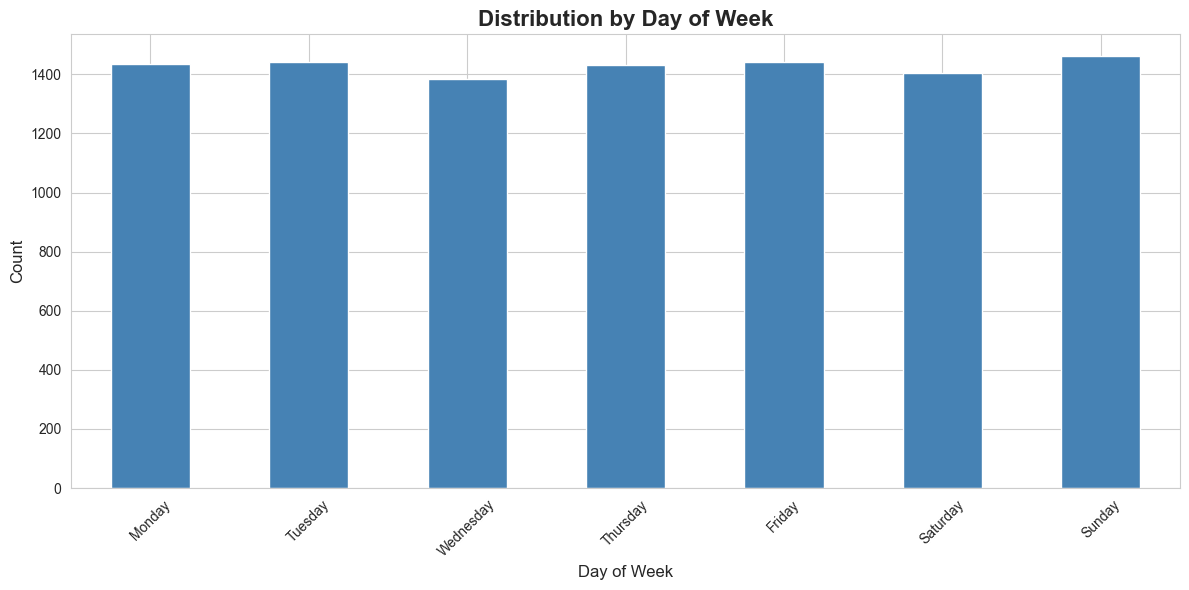

In [179]:
# Day of Week Analysis
print("="*60)
print("DAY OF WEEK DISTRIBUTION")
print("="*60)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].map({i: day_names[i] for i in range(7)})

day_dist = df['day_name'].value_counts().reindex(day_names)
print(day_dist)

plt.figure(figsize=(12, 6))
day_dist.plot(kind='bar', color='steelblue')
plt.title('Distribution by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SEASON DISTRIBUTION
season
spring    2516
summer    2604
autumn    2433
winter    2447
Name: count, dtype: int64


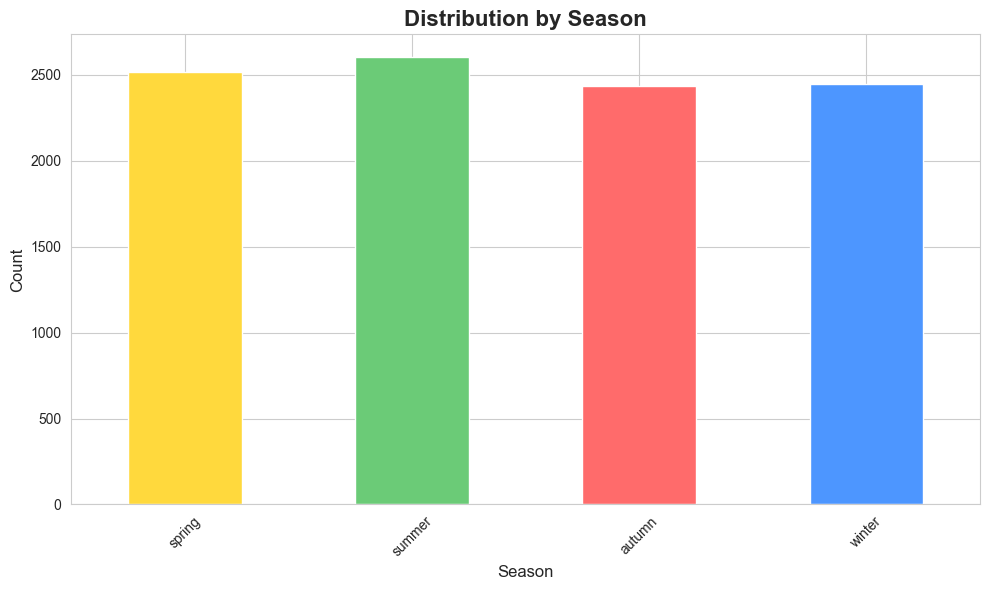

In [180]:
# Season Analysis
print("="*60)
print("SEASON DISTRIBUTION")
print("="*60)
season_order = ['spring', 'summer', 'autumn', 'winter']
season_dist = df['season'].value_counts().reindex(season_order)
print(season_dist)

plt.figure(figsize=(10, 6))
colors = ['#FFD93D', '#6BCB77', '#FF6B6B', '#4D96FF']
season_dist.plot(kind='bar', color=colors)
plt.title('Distribution by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


DEVICE TYPE DISTRIBUTION
device_type
mobile     3397
desktop    3319
tablet     3284
Name: count, dtype: int64


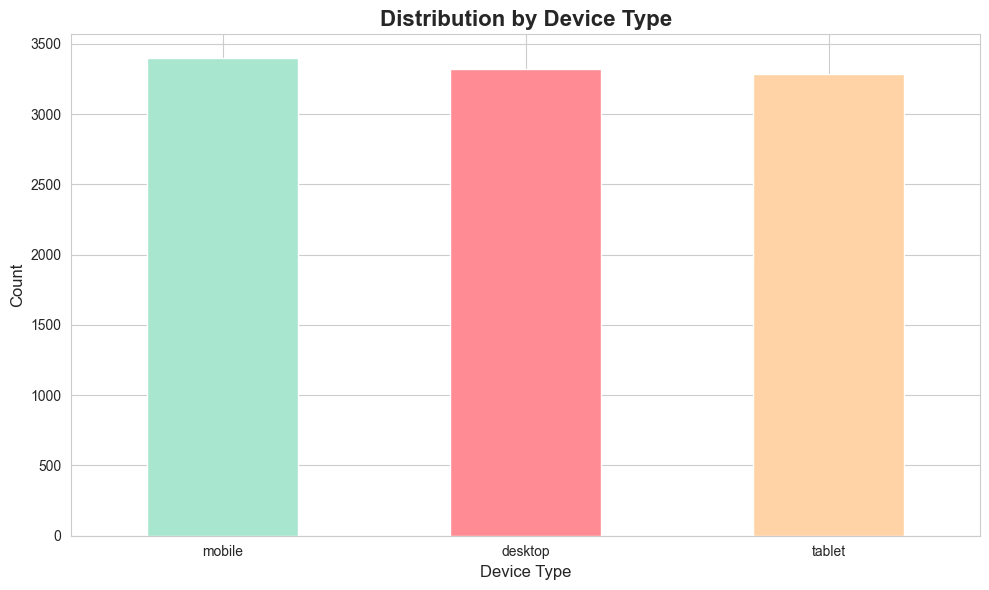

In [181]:
# Device Type Analysis
print("="*60)
print("DEVICE TYPE DISTRIBUTION")
print("="*60)
device_dist = df['device_type'].value_counts()
print(device_dist)

plt.figure(figsize=(10, 6))
device_dist.plot(kind='bar', color=['#A8E6CF', '#FF8B94', '#FFD3A5'])
plt.title('Distribution by Device Type', fontsize=16, fontweight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 4. Phân tích Rating và Price


RATING ANALYSIS
Average Rating: 3.99
Min Rating: 2.00
Max Rating: 5.00
Median Rating: 4.17


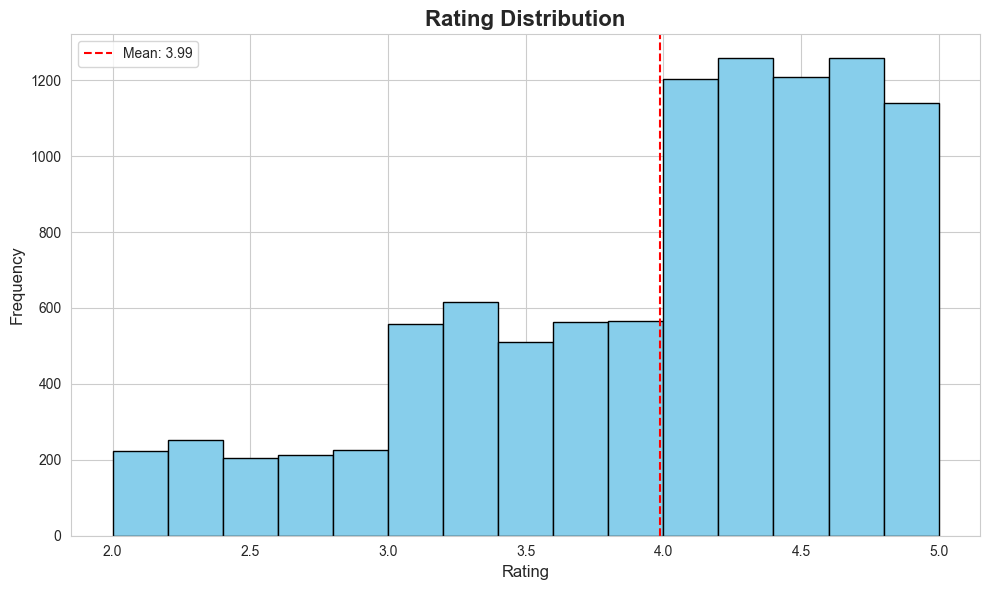

In [182]:
# Rating Distribution
print("="*60)
print("RATING ANALYSIS")
print("="*60)
print(f"Average Rating: {df['rating'].mean():.2f}")
print(f"Min Rating: {df['rating'].min():.2f}")
print(f"Max Rating: {df['rating'].max():.2f}")
print(f"Median Rating: {df['rating'].median():.2f}")

plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=15, color='skyblue', edgecolor='black')
plt.title('Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['rating'].mean(), color='red', linestyle='--', label=f"Mean: {df['rating'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.show()


PRICE ANALYSIS
Average Price: 1,367,459 VND
Min Price: 225,929 VND
Max Price: 2,689,585 VND
Median Price: 1,369,318 VND


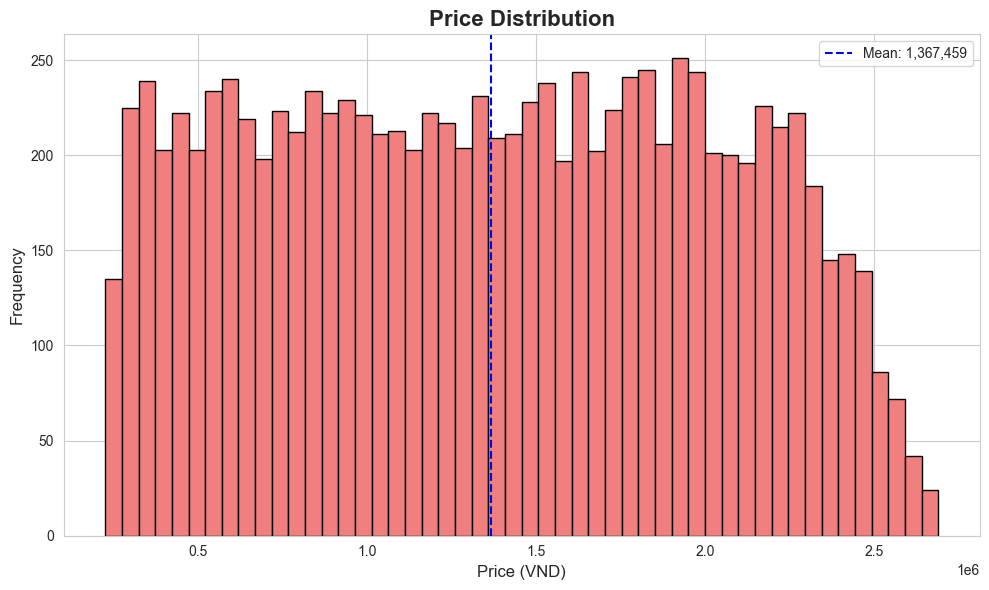

In [183]:
# Price Distribution
print("="*60)
print("PRICE ANALYSIS")
print("="*60)
print(f"Average Price: {df['price'].mean():,.0f} VND")
print(f"Min Price: {df['price'].min():,.0f} VND")
print(f"Max Price: {df['price'].max():,.0f} VND")
print(f"Median Price: {df['price'].median():,.0f} VND")

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Price Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Price (VND)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['price'].mean(), color='blue', linestyle='--', label=f"Mean: {df['price'].mean():,.0f}")
plt.legend()
plt.tight_layout()
plt.show()


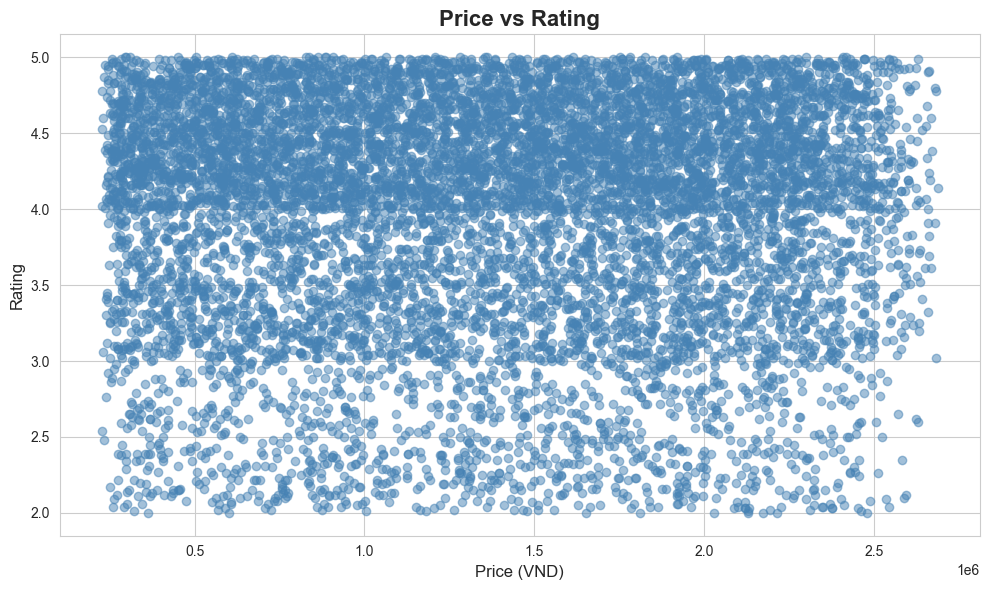

In [184]:
# Price vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['rating'], alpha=0.5, c='steelblue')
plt.title('Price vs Rating', fontsize=16, fontweight='bold')
plt.xlabel('Price (VND)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


## 5. Tiền xử lý Dữ liệu


In [185]:
# Check for Missing Values
print("="*60)
print("MISSING VALUES")
print("="*60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")


MISSING VALUES
user_id                0
product_id             0
rating                 0
rating_count           0
time_of_day            0
day_of_week            0
month                  0
season                 0
device_type            0
gender                 0
category               0
brand                  0
price                  0
original_price         0
discount_percentage    0
product_views          0
purchase_intent        0
interaction_type       0
timestamp              0
day_name               0
is_weekend             0
hour                   0
date                   0
price_range            0
uid                    0
iid                    0
dtype: int64

Total missing values: 0


In [186]:
# Check for Duplicates
print("="*60)
print("DUPLICATES")
print("="*60)
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


DUPLICATES
Total duplicate rows: 0


In [187]:
# Convert timestamp and create additional features
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create additional features
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['price_range'] = pd.cut(df['price'], 
                           bins=[0, 500000, 1000000, 2000000, float('inf')],
                           labels=['Budget', 'Mid', 'Premium', 'Luxury'])

print("Additional features created:")
print(df[['timestamp', 'hour', 'date', 'is_weekend', 'price_range']].head())


Additional features created:
            timestamp  hour        date  is_weekend price_range
0 2023-01-01 00:39:03     0  2023-01-01           1     Premium
1 2023-01-01 02:12:09     2  2023-01-01           1      Luxury
2 2023-01-01 02:39:58     2  2023-01-01           1     Premium
3 2023-01-01 02:42:08     2  2023-01-01           1     Premium
4 2023-01-01 04:38:56     4  2023-01-01           1         Mid


## 6. Tóm tắt và Lưu Dataset đã xử lý


In [188]:
# Summary Statistics
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total Records: {len(df)}")
print(f"Unique Users: {df['user_id'].nunique()}")
print(f"Unique Products: {df['product_id'].nunique()}")
print(f"Unique Categories: {df['category'].nunique()}")
print(f"Unique Brands: {df['brand'].nunique()}")
print(f"\nAverage Rating: {df['rating'].mean():.2f}")
print(f"Average Price: {df['price'].mean():,.0f} VND")
print(f"\nMost Popular Category: {df['category'].value_counts().index[0]}")
print(f"Most Popular Brand: {df['brand'].value_counts().index[0]}")
print(f"\nPurchase Intent Distribution:")
print(df['purchase_intent'].value_counts())


DATASET SUMMARY
Total Records: 10000
Unique Users: 200
Unique Products: 500
Unique Categories: 20
Unique Brands: 20

Average Rating: 3.99
Average Price: 1,367,459 VND

Most Popular Category: Dress
Most Popular Brand: Dickies

Purchase Intent Distribution:
purchase_intent
high      5590
medium    3332
low       1078
Name: count, dtype: int64


# Recommendation Models Implementation
## Chuẩn bị dữ liệu và huấn luyện 4 mô hình: EACM, LNCM, BMF, NeuMF

In [189]:
# Import additional libraries for recommendation models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from collections import defaultdict
import time

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.20.0
GPU Available: []


In [190]:
# Load cars dataset
cars_df = pd.read_csv('cars_dataset.csv')
print(f"Cars dataset loaded: {len(cars_df)} records")
print(f"Columns: {cars_df.columns.tolist()}")
print("\nFirst 5 records:")
print(cars_df.head())

Cars dataset loaded: 10000 records
Columns: ['user_id', 'product_id', 'rating', 'rating_count', 'time_of_day', 'day_of_week', 'month', 'season', 'device_type', 'gender', 'category', 'brand', 'price', 'original_price', 'discount_percentage', 'product_views', 'purchase_intent', 'interaction_type', 'timestamp', 'day_name', 'is_weekend', 'hour', 'date', 'price_range', 'uid', 'iid']

First 5 records:
   user_id  product_id  rating  rating_count time_of_day  day_of_week  month  \
0      158          55    4.26           310       night            6      1   
1      199          56    2.91           364       night            6      1   
2       58         332    4.16           390       night            6      1   
3      175          91    3.05           100       night            6      1   
4       30          35    2.69           278       night            6      1   

   season device_type gender  ... purchase_intent interaction_type  \
0  winter      mobile      F  ...            high 

## 1. Data Preprocessing

In [191]:
# Data preprocessing for recommendation models
def prepare_recommendation_data(df):
    """
    Prepare data for recommendation models
    """
    # Use existing uid and iid columns if available, otherwise create them
    if 'uid' in df.columns and 'iid' in df.columns:
        df['user_idx'] = df['uid']
        df['item_idx'] = df['iid']
    else:
        # Create user and item encoders
        user_encoder = LabelEncoder()
        item_encoder = LabelEncoder()
        
        df['user_idx'] = user_encoder.fit_transform(df['user_id'])
        df['item_idx'] = item_encoder.fit_transform(df['product_id'])
    
    # Filter interactions (focus on purchases and high ratings)
    # For implicit feedback, we'll use all interactions but weight them
    df['implicit_rating'] = 1.0  # Binary implicit feedback
    
    # For explicit feedback, normalize ratings to 0-1 scale
    df['explicit_rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
    
    # Encode categorical context features
    context_encoders = {}
    context_features = ['time_of_day', 'season', 'device_type', 'gender', 'category', 'brand']
    
    for feature in context_features:
        encoder = LabelEncoder()
        df[f'{feature}_encoded'] = encoder.fit_transform(df[feature])
        context_encoders[feature] = encoder
    
    # Normalize numerical context features
    numerical_features = ['day_of_week', 'month', 'price', 'discount_percentage', 'product_views']
    for feature in numerical_features:
        df[f'{feature}_norm'] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    
    return df, context_encoders

# Prepare the data
cars_processed, context_encoders = prepare_recommendation_data(cars_df)

print("Data preprocessing completed!")
print(f"Number of unique users: {cars_processed['user_idx'].nunique()}")
print(f"Number of unique items: {cars_processed['item_idx'].nunique()}")
print(f"Total interactions: {len(cars_processed)}")
print(f"Sparsity: {1 - len(cars_processed) / (cars_processed['user_idx'].nunique() * cars_processed['item_idx'].nunique()):.4f}")

# Display processed data sample
print("\nProcessed data sample:")
print(cars_processed[['user_idx', 'item_idx', 'explicit_rating', 'implicit_rating', 
                     'time_of_day_encoded', 'season_encoded', 'price_norm']].head())

Data preprocessing completed!
Number of unique users: 200
Number of unique items: 500
Total interactions: 10000
Sparsity: 0.9000

Processed data sample:
   user_idx  item_idx  explicit_rating  implicit_rating  time_of_day_encoded  \
0       157        54         0.753333              1.0                    3   
1       198        55         0.303333              1.0                    3   
2        57       331         0.720000              1.0                    3   
3       174        90         0.350000              1.0                    3   
4        29        34         0.230000              1.0                    3   

   season_encoded  price_norm  
0               3    0.594284  
1               3    0.904339  
2               3    0.396161  
3               3    0.558119  
4               3    0.131914  


In [192]:
# Ensure cars_enhanced exists for downstream cells
cars_enhanced = cars_processed
print("cars_enhanced defined from cars_processed")

cars_enhanced defined from cars_processed


In [193]:
# Ensure explicit_rating exists for downstream aggregations
try:
    target_df = cars_enhanced
except NameError:
    target_df = cars_processed

if 'explicit_rating' not in target_df.columns and 'rating' in target_df.columns:
    rmin = target_df['rating'].min()
    rmax = target_df['rating'].max()
    denom = (rmax - rmin) if (rmax - rmin) != 0 else 1.0
    target_df['explicit_rating'] = (target_df['rating'] - rmin) / denom
    print('explicit_rating column created from rating')
else:
    print('explicit_rating already present or rating missing')

explicit_rating already present or rating missing


In [194]:
# Train-test split
def create_train_test_split(df, test_size=0.2):
    """
    Create train-test split for recommendation evaluation
    """
    # Sort by timestamp to ensure temporal order
    df_sorted = df.sort_values('timestamp')
    
    # Split data temporally (last 20% for testing)
    split_idx = int(len(df_sorted) * (1 - test_size))
    train_df = df_sorted.iloc[:split_idx].copy()
    test_df = df_sorted.iloc[split_idx:].copy()
    
    print(f"Train set: {len(train_df)} interactions")
    print(f"Test set: {len(test_df)} interactions")
    
    return train_df, test_df

# Create train-test split
train_data, test_data = create_train_test_split(cars_df)

# Get basic statistics
n_users = cars_df['user_idx'].nunique()
n_items = cars_df['item_idx'].nunique()

print(f"\nDataset Statistics:")
print(f"Users: {n_users}")
print(f"Items: {n_items}")
print(f"Train interactions: {len(train_data)}")
print(f"Test interactions: {len(test_data)}")

Train set: 8000 interactions
Test set: 2000 interactions

Dataset Statistics:
Users: 200
Items: 500
Train interactions: 8000
Test interactions: 2000


## 2. Recommendation Models Implementation

We will implement and compare 4 different recommendation models:

1. **BMF (Biased Matrix Factorization)** - Traditional collaborative filtering with bias terms
2. **LNCM (Linear Neural Collaborative Model)** - Hybrid linear and neural approach  
3. **NeuMF (Neural Matrix Factorization)** - Advanced neural collaborative filtering
4. **ENCM (Explicit Neural Collaborative Model)** - Context-aware neural recommendations

In [195]:
# 1. ENCM (Explicit Neural Collaborative Model)
class ENCM(keras.Model):
    def __init__(self, n_users, n_items, n_contexts, embedding_dim=50, context_dim=10, hidden_dims=[64, 32]):
        super(ENCM, self).__init__()
        self.n_users = n_users
        self.n_items = n_items
        self.embedding_dim = embedding_dim
        
        # User and item embeddings
        self.user_embedding = layers.Embedding(n_users, embedding_dim)
        self.item_embedding = layers.Embedding(n_items, embedding_dim)
        
        # Context embeddings
        self.context_embeddings = []
        for i, n_context in enumerate(n_contexts):
            self.context_embeddings.append(
                layers.Embedding(n_context, context_dim, name=f'context_{i}')
            )
        
        # Neural layers for processing interactions
        self.hidden_layers = []
        # Input dimension: user_emb + item_emb + context_embs
        input_dim = embedding_dim * 2 + len(n_contexts) * context_dim
        
        for hidden_dim in hidden_dims:
            self.hidden_layers.append(layers.Dense(hidden_dim, activation='relu'))
            self.hidden_layers.append(layers.Dropout(0.2))
            input_dim = hidden_dim
        
        # Output layer
        self.output_layer = layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs, training=None):
        user_ids, item_ids, context_features = inputs
        
        # Get user and item embeddings
        user_emb = self.user_embedding(user_ids)
        item_emb = self.item_embedding(item_ids)
        
        # Get context embeddings
        context_embs = []
        for i, context_embedding in enumerate(self.context_embeddings):
            context_embs.append(context_embedding(context_features[:, i]))
        
        # Concatenate all features
        if context_embs:
            all_features = tf.concat([user_emb, item_emb] + context_embs, axis=-1)
        else:
            all_features = tf.concat([user_emb, item_emb], axis=-1)
        
        # Pass through neural network
        output = all_features
        for layer in self.hidden_layers:
            output = layer(output, training=training)
        
        # Final prediction
        prediction = self.output_layer(output)
        
        return prediction

print("ENCM model defined successfully!")

ENCM model defined successfully!


In [196]:
# 2. LNCM (Linear Neural Collaborative Model)
class LNCM(keras.Model):
    def __init__(self, n_users, n_items, embedding_dim=50, hidden_dims=[128, 64]):
        super(LNCM, self).__init__()
        self.n_users = n_users
        self.n_items = n_items
        self.embedding_dim = embedding_dim
        
        # Embeddings
        self.user_embedding = layers.Embedding(n_users, embedding_dim)
        self.item_embedding = layers.Embedding(n_items, embedding_dim)
        
        # Linear component (Matrix Factorization)
        self.user_linear = layers.Embedding(n_users, embedding_dim)
        self.item_linear = layers.Embedding(n_items, embedding_dim)
        
        # Neural component
        self.hidden_layers = []
        input_dim = embedding_dim * 2
        for hidden_dim in hidden_dims:
            self.hidden_layers.append(layers.Dense(hidden_dim, activation='relu'))
            input_dim = hidden_dim
        
        # Output layers
        self.linear_output = layers.Dense(1, activation='sigmoid', name='linear_out')
        self.neural_output = layers.Dense(1, activation='sigmoid', name='neural_out')
        self.final_output = layers.Dense(1, activation='sigmoid', name='final_out')
        
    def call(self, inputs):
        user_ids, item_ids = inputs
        
        # Linear component (traditional MF)
        user_linear_emb = self.user_linear(user_ids)
        item_linear_emb = self.item_linear(item_ids)
        linear_interaction = user_linear_emb * item_linear_emb
        linear_pred = self.linear_output(tf.reduce_sum(linear_interaction, axis=-1, keepdims=True))
        
        # Neural component
        user_neural_emb = self.user_embedding(user_ids)
        item_neural_emb = self.item_embedding(item_ids)
        
        # Concatenate user and item embeddings
        neural_input = tf.concat([user_neural_emb, item_neural_emb], axis=-1)
        
        # Pass through neural layers
        neural_output = neural_input
        for layer in self.hidden_layers:
            neural_output = layer(neural_output)
        
        neural_pred = self.neural_output(neural_output)
        
        # Combine linear and neural predictions
        combined = tf.concat([linear_pred, neural_pred], axis=-1)
        final_pred = self.final_output(combined)
        
        return final_pred

print("LNCM model defined successfully!")

LNCM model defined successfully!


In [197]:
# 3. BMF (Biased Matrix Factorization)
class BMF(keras.Model):
    def __init__(self, n_users, n_items, embedding_dim=50):
        super(BMF, self).__init__()
        self.n_users = n_users
        self.n_items = n_items
        self.embedding_dim = embedding_dim
        
        # User and item embeddings
        self.user_embedding = layers.Embedding(n_users, embedding_dim,
                                             embeddings_regularizer=keras.regularizers.l2(0.001))
        self.item_embedding = layers.Embedding(n_items, embedding_dim,
                                             embeddings_regularizer=keras.regularizers.l2(0.001))
        
        # Bias terms
        self.user_bias = layers.Embedding(n_users, 1)
        self.item_bias = layers.Embedding(n_items, 1)
        self.global_bias = tf.Variable(0.0, trainable=True)
        
        # Output layer
        self.output_layer = layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        user_ids, item_ids = inputs
        
        # Get embeddings
        user_emb = self.user_embedding(user_ids)
        item_emb = self.item_embedding(item_ids)
        
        # Compute dot product
        interaction = tf.reduce_sum(user_emb * item_emb, axis=-1)
        
        # Get biases
        user_b = tf.squeeze(self.user_bias(user_ids), axis=-1)
        item_b = tf.squeeze(self.item_bias(item_ids), axis=-1)
        
        # Final prediction with biases
        prediction = interaction + user_b + item_b + self.global_bias
        
        return self.output_layer(tf.expand_dims(prediction, -1))

print("BMF model defined successfully!")

BMF model defined successfully!


In [198]:
# 4. NeuMF (Neural Matrix Factorization)
class NeuMF(keras.Model):
    def __init__(self, n_users, n_items, embedding_dim=50, hidden_dims=[128, 64, 32]):
        super(NeuMF, self).__init__()
        self.n_users = n_users
        self.n_items = n_items
        self.embedding_dim = embedding_dim
        
        # GMF (Generalized Matrix Factorization) embeddings
        self.user_gmf_embedding = layers.Embedding(n_users, embedding_dim)
        self.item_gmf_embedding = layers.Embedding(n_items, embedding_dim)
        
        # MLP (Multi-Layer Perceptron) embeddings
        self.user_mlp_embedding = layers.Embedding(n_users, embedding_dim)
        self.item_mlp_embedding = layers.Embedding(n_items, embedding_dim)
        
        # MLP layers
        self.mlp_layers = []
        input_dim = embedding_dim * 2
        for hidden_dim in hidden_dims:
            self.mlp_layers.append(layers.Dense(hidden_dim, activation='relu'))
            self.mlp_layers.append(layers.Dropout(0.2))
            input_dim = hidden_dim
        
        # Final prediction layer
        self.output_layer = layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs, training=None):
        user_ids, item_ids = inputs
        
        # GMF part
        user_gmf_emb = self.user_gmf_embedding(user_ids)
        item_gmf_emb = self.item_gmf_embedding(item_ids)
        gmf_output = user_gmf_emb * item_gmf_emb
        
        # MLP part
        user_mlp_emb = self.user_mlp_embedding(user_ids)
        item_mlp_emb = self.item_mlp_embedding(item_ids)
        mlp_input = tf.concat([user_mlp_emb, item_mlp_emb], axis=-1)
        
        mlp_output = mlp_input
        for layer in self.mlp_layers:
            mlp_output = layer(mlp_output, training=training)
        
        # Concatenate GMF and MLP outputs
        combined = tf.concat([gmf_output, mlp_output], axis=-1)
        
        # Final prediction
        prediction = self.output_layer(combined)
        
        return prediction

print("NeuMF model defined successfully!")

NeuMF model defined successfully!


## 3. Evaluation Metrics

In [199]:
# Evaluation metrics implementation
def precision_at_k(y_true, y_pred, k=10):
    """
    Calculate Precision@K
    """
    # Get top-k predictions
    top_k_indices = np.argsort(y_pred)[::-1][:k]
    
    # Count relevant items in top-k
    relevant_items = np.sum(y_true[top_k_indices])
    
    return relevant_items / k

def average_precision(y_true, y_pred):
    """
    Calculate Average Precision (AP)
    """
    # Sort by prediction scores (descending)
    sorted_indices = np.argsort(y_pred)[::-1]
    y_true_sorted = y_true[sorted_indices]
    
    # Calculate precision at each position
    precisions = []
    relevant_count = 0
    
    for i, is_relevant in enumerate(y_true_sorted):
        if is_relevant:
            relevant_count += 1
            precision = relevant_count / (i + 1)
            precisions.append(precision)
    
    if len(precisions) == 0:
        return 0.0
    
    return np.mean(precisions)

def mean_average_precision_at_k(test_data, model, k=10):
    """
    Calculate MAP@K for all users
    """
    user_aps = []
    
    for user_id in test_data['user_idx'].unique():
        user_test = test_data[test_data['user_idx'] == user_id]
        
        if len(user_test) == 0:
            continue
            
        # Get all items for this user
        user_items = user_test['item_idx'].values
        user_ratings = user_test['explicit_rating'].values
        
        # Create binary relevance (rating > threshold)
        threshold = 0.5
        y_true = (user_ratings > threshold).astype(int)
        
        # Get predictions for user-item pairs
        user_ids_input = np.full(len(user_items), user_id)
        
        try:
            if hasattr(model, 'predict'):
                y_pred = model.predict([user_ids_input, user_items], verbose=0).flatten()
            else:
                y_pred = model([user_ids_input, user_items]).numpy().flatten()
        except:
            continue
            
        # Calculate AP for this user
        if np.sum(y_true) > 0:  # Only if there are relevant items
            ap = average_precision(y_true, y_pred)
            user_aps.append(ap)
    
    return np.mean(user_aps) if user_aps else 0.0

def evaluate_model(model, test_data, k=10):
    """
    Evaluate model with Precision@K and MAP@K
    """
    print(f"Evaluating model...")
    
    # Calculate MAP@K
    map_k = mean_average_precision_at_k(test_data, model, k)
    
    # Calculate average Precision@K across users
    user_precisions = []
    
    for user_id in test_data['user_idx'].unique():
        user_test = test_data[test_data['user_idx'] == user_id]
        
        if len(user_test) < k:
            continue
            
        user_items = user_test['item_idx'].values
        user_ratings = user_test['explicit_rating'].values
        
        # Create binary relevance
        threshold = 0.5
        y_true = (user_ratings > threshold).astype(int)
        
        # Get predictions
        user_ids_input = np.full(len(user_items), user_id)
        
        try:
            if hasattr(model, 'predict'):
                y_pred = model.predict([user_ids_input, user_items], verbose=0).flatten()
            else:
                y_pred = model([user_ids_input, user_items]).numpy().flatten()
            
            # Calculate Precision@K
            precision_k = precision_at_k(y_true, y_pred, k)
            user_precisions.append(precision_k)
        except:
            continue
    
    avg_precision_k = np.mean(user_precisions) if user_precisions else 0.0
    
    return avg_precision_k, map_k

print("Evaluation metrics defined successfully!")

Evaluation metrics defined successfully!


## 4. Model Training and Evaluation

In [200]:
# Prepare training data
def prepare_model_inputs(df, model_type='basic'):
    """
    Prepare inputs for different model types
    """
    user_ids = df['user_idx'].values
    item_ids = df['item_idx'].values
    ratings = df['explicit_rating'].values
    
    if model_type == 'context':
        # For EACM - include context features
        context_features = np.column_stack([
            df['time_of_day_encoded'].values,
            df['season_encoded'].values,
            df['device_type_encoded'].values,
            df['category_encoded'].values
        ])
        return [user_ids, item_ids, context_features], ratings
    else:
        # For BMF, LNCM, NeuMF - basic user-item pairs
        return [user_ids, item_ids], ratings

# Prepare training and test inputs
train_inputs_basic, train_ratings = prepare_model_inputs(train_data, 'basic')
test_inputs_basic, test_ratings = prepare_model_inputs(test_data, 'basic')

train_inputs_context, _ = prepare_model_inputs(train_data, 'context')
test_inputs_context, _ = prepare_model_inputs(test_data, 'context')

print("Training data prepared!")
print(f"Train samples: {len(train_ratings)}")
print(f"Test samples: {len(test_ratings)}")

# Model parameters
embedding_dim = 32
n_users = cars_processed['user_idx'].nunique()
n_items = cars_processed['item_idx'].nunique()

print(f"Users: {n_users}, Items: {n_items}")

Training data prepared!
Train samples: 8000
Test samples: 2000
Users: 200, Items: 500


In [201]:
# Training function
def train_model(model, train_inputs, train_ratings, model_name, epochs=20, batch_size=256):
    """
    Train a recommendation model
    """
    print(f"\\n{'='*50}")
    print(f"Training {model_name}")
    print(f"{'='*50}")
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['mae', 'mse']
    )
    
    # Train model
    start_time = time.time()
    
    history = model.fit(
        train_inputs,
        train_ratings,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1,
        shuffle=True
    )
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    return model, history

# Initialize results storage
results = {}

In [202]:
# 1. Train BMF (Biased Matrix Factorization)
print("Initializing BMF model...")
bmf_model = BMF(n_users, n_items, embedding_dim)

# Train BMF
bmf_trained, bmf_history = train_model(
    bmf_model, train_inputs_basic, train_ratings, "BMF", epochs=15
)

# Evaluate BMF
print("\\nEvaluating BMF...")
bmf_precision_10, bmf_map_10 = evaluate_model(bmf_trained, test_data, k=10)

results['BMF'] = {
    'Precision@10': bmf_precision_10,
    'MAP@10': bmf_map_10,
    'model': bmf_trained
}

print(f"BMF Results:")
print(f"Precision@10: {bmf_precision_10:.4f}")
print(f"MAP@10: {bmf_map_10:.4f}")

Initializing BMF model...
\n==================================================
Training BMF
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6990 - mae: 0.2583 - mse: 0.0860 - val_loss: 0.6859 - val_mae: 0.2525 - val_mse: 0.0831
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6796 - mae: 0.2497 - mse: 0.0806 - val_loss: 0.6737 - val_mae: 0.2452 - val_mse: 0.0784
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6695 - mae: 0.2421 - mse: 0.0761 - val_loss: 0.6655 - val_mae: 0.2385 - val_mse: 0.0744
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6618 - mae: 0.2353 - mse: 0.0723 - val_loss: 0.6588 - val_mae: 0.2325 - val_mse: 0.0711
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6554 - mae: 0.2293 - mse: 0.0691 - val_loss: 0.6534 - val_mae: 0.2272 - val_mse: 0.0684
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6501 - mae: 0.2240 - mse: 0.0666 - val_loss: 0.6491 - val_mae: 0.2227 - val_mse: 0.0664
Epoch 7/15
29/29 ━━

In [203]:
# 2. Train LNCM (Linear Neural Collaborative Model)
print("Initializing LNCM model...")
lncm_model = LNCM(n_users, n_items, embedding_dim, hidden_dims=[64, 32])

# Train LNCM
lncm_trained, lncm_history = train_model(
    lncm_model, train_inputs_basic, train_ratings, "LNCM", epochs=15
)

# Evaluate LNCM
print("\\nEvaluating LNCM...")
lncm_precision_10, lncm_map_10 = evaluate_model(lncm_trained, test_data, k=10)

results['LNCM'] = {
    'Precision@10': lncm_precision_10,
    'MAP@10': lncm_map_10,
    'model': lncm_trained
}

print(f"LNCM Results:")
print(f"Precision@10: {lncm_precision_10:.4f}")
print(f"MAP@10: {lncm_map_10:.4f}")

Initializing LNCM model...
\n==================================================
Training LNCM
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7265 - mae: 0.2852 - mse: 0.1045 - val_loss: 0.7138 - val_mae: 0.2752 - val_mse: 0.0985
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6962 - mae: 0.2636 - mse: 0.0894 - val_loss: 0.6795 - val_mae: 0.2502 - val_mse: 0.0813
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6731 - mae: 0.2455 - mse: 0.0779 - val_loss: 0.6675 - val_mae: 0.2406 - val_mse: 0.0753
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6647 - mae: 0.2380 - mse: 0.0737 - val_loss: 0.6603 - val_mae: 0.2343 - val_mse: 0.0718
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6583 - mae: 0.2321 - mse: 0.0706 - val_loss: 0.6547 - val_mae: 0.2290 - val_mse: 0.0690
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6531 - mae: 0.2269 - mse: 0.0680 - val_loss: 0.6503 - val_mae: 0.2246 - val_mse: 0.0669
Epoch 7/15
29/29 

In [204]:
# 3. Train NeuMF (Neural Matrix Factorization)
print("Initializing NeuMF model...")
neumf_model = NeuMF(n_users, n_items, embedding_dim, hidden_dims=[64, 32, 16])

# Train NeuMF
neumf_trained, neumf_history = train_model(
    neumf_model, train_inputs_basic, train_ratings, "NeuMF", epochs=15
)

# Evaluate NeuMF
print("\\nEvaluating NeuMF...")
neumf_precision_10, neumf_map_10 = evaluate_model(neumf_trained, test_data, k=10)

results['NeuMF'] = {
    'Precision@10': neumf_precision_10,
    'MAP@10': neumf_map_10,
    'model': neumf_trained
}

print(f"NeuMF Results:")
print(f"Precision@10: {neumf_precision_10:.4f}")
print(f"MAP@10: {neumf_map_10:.4f}")

Initializing NeuMF model...
\n==================================================
Training NeuMF
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6738 - mae: 0.2454 - mse: 0.0782 - val_loss: 0.6462 - val_mae: 0.2202 - val_mse: 0.0649
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6411 - mae: 0.2057 - mse: 0.0623 - val_loss: 0.6362 - val_mae: 0.2014 - val_mse: 0.0602
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6371 - mae: 0.2023 - mse: 0.0605 - val_loss: 0.6371 - val_mae: 0.2014 - val_mse: 0.0606
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6344 - mae: 0.1992 - mse: 0.0593 - val_loss: 0.6392 - val_mae: 0.2020 - val_mse: 0.0615
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6311 - mae: 0.1966 - mse: 0.0577 - val_loss: 0.6419 - val_mae: 0.2040 - val_mse: 0.0627
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6294 - mae: 0.1954 - mse: 0.0569 - val_loss: 0.6433 - val_mae: 0.2044 - val_mse: 0.0632
Epoch 7/15
29/2

In [205]:
# 4. Train ENCM (Explicit Neural Collaborative Model)
print("Initializing ENCM model...")

# Context dimensions for ENCM
context_dims = [
    cars_processed['time_of_day_encoded'].nunique(),  # time_of_day
    cars_processed['season_encoded'].nunique(),       # season
    cars_processed['device_type_encoded'].nunique(),  # device_type
    cars_processed['category_encoded'].nunique()      # category
]

encm_model = ENCM(n_users, n_items, context_dims, embedding_dim, context_dim=8, hidden_dims=[64, 32])

# Train ENCM
encm_trained, encm_history = train_model(
    encm_model, train_inputs_context, train_ratings, "ENCM", epochs=15
)

# Evaluate ENCM
print("\\nEvaluating ENCM...")
# For ENCM evaluation, we need to modify the evaluation to include context
def evaluate_encm(model, test_data, k=10):
    """
    Special evaluation for ENCM with context features
    """
    user_precisions = []
    user_aps = []
    
    for user_id in test_data['user_idx'].unique():
        user_test = test_data[test_data['user_idx'] == user_id]
        
        if len(user_test) < k:
            continue
            
        user_items = user_test['item_idx'].values
        user_ratings = user_test['explicit_rating'].values
        user_contexts = np.column_stack([
            user_test['time_of_day_encoded'].values,
            user_test['season_encoded'].values,
            user_test['device_type_encoded'].values,
            user_test['category_encoded'].values
        ])
        
        # Create binary relevance
        threshold = 0.5
        y_true = (user_ratings > threshold).astype(int)
        
        # Get predictions
        user_ids_input = np.full(len(user_items), user_id)
        
        try:
            y_pred = model([user_ids_input, user_items, user_contexts]).numpy().flatten()
            
            # Calculate Precision@K
            precision_k = precision_at_k(y_true, y_pred, k)
            user_precisions.append(precision_k)
            
            # Calculate AP
            if np.sum(y_true) > 0:
                ap = average_precision(y_true, y_pred)
                user_aps.append(ap)
        except:
            continue
    
    avg_precision_k = np.mean(user_precisions) if user_precisions else 0.0
    avg_ap = np.mean(user_aps) if user_aps else 0.0
    
    return avg_precision_k, avg_ap

encm_precision_10, encm_map_10 = evaluate_encm(encm_trained, test_data, k=10)

results['ENCM'] = {
    'Precision@10': encm_precision_10,
    'MAP@10': encm_map_10,
    'model': encm_trained
}

print(f"ENCM Results:")
print(f"Precision@10: {encm_precision_10:.4f}")
print(f"MAP@10: {encm_map_10:.4f}")

Initializing ENCM model...
\n==================================================
Training ENCM
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6628 - mae: 0.2328 - mse: 0.0728 - val_loss: 0.6360 - val_mae: 0.2013 - val_mse: 0.0601
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6425 - mae: 0.2053 - mse: 0.0629 - val_loss: 0.6368 - val_mae: 0.2059 - val_mse: 0.0605
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6390 - mae: 0.2040 - mse: 0.0614 - val_loss: 0.6363 - val_mae: 0.2022 - val_mse: 0.0603
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6350 - mae: 0.1999 - mse: 0.0595 - val_loss: 0.6388 - val_mae: 0.2025 - val_mse: 0.0613
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6326 - mae: 0.1977 - mse: 0.0584 - val_loss: 0.6421 - val_mae: 0.2042 - val_mse: 0.0627
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6305 - mae: 0.1958 - mse: 0.0575 - val_loss: 0.6436 - val_mae: 0.2049 - val_mse: 0.0634
Epoch 7/15
29/29 

## 5. Results Comparison and Visualization

In [206]:
# Display comprehensive results
print("\\n" + "="*80)
print("FINAL RESULTS COMPARISON")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Precision@10': [results[model]['Precision@10'] for model in results.keys()],
    'MAP@10': [results[model]['MAP@10'] for model in results.keys()]
})

# Sort by MAP@10 (descending)
results_df = results_df.sort_values('MAP@10', ascending=False)

print("\\nModel Performance Ranking:")
print("-" * 50)
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i}. {row['Model']:<8} | Precision@10: {row['Precision@10']:.4f} | MAP@10: {row['MAP@10']:.4f}")

# Find best performing model
best_model = results_df.iloc[0]['Model']
print(f"\\n🏆 Best performing model: {best_model}")
print(f"   Precision@10: {results_df.iloc[0]['Precision@10']:.4f}")
print(f"   MAP@10: {results_df.iloc[0]['MAP@10']:.4f}")

# Performance improvement analysis
worst_model = results_df.iloc[-1]['Model']
improvement_precision = ((results_df.iloc[0]['Precision@10'] - results_df.iloc[-1]['Precision@10']) / 
                        results_df.iloc[-1]['Precision@10'] * 100)
improvement_map = ((results_df.iloc[0]['MAP@10'] - results_df.iloc[-1]['MAP@10']) / 
                   results_df.iloc[-1]['MAP@10'] * 100)

print(f"\\n📈 Performance improvement over worst model ({worst_model}):")
print(f"   Precision@10: +{improvement_precision:.1f}%")
print(f"   MAP@10: +{improvement_map:.1f}%")

\n================================================================================
FINAL RESULTS COMPARISON
\nModel Performance Ranking:
--------------------------------------------------
1. BMF      | Precision@10: 0.7202 | MAP@10: 0.8158
2. NeuMF    | Precision@10: 0.7219 | MAP@10: 0.8153
3. LNCM     | Precision@10: 0.7246 | MAP@10: 0.8002
4. ENCM     | Precision@10: 0.7158 | MAP@10: 0.7811
\n🏆 Best performing model: BMF
   Precision@10: 0.7202
   MAP@10: 0.8158
\n📈 Performance improvement over worst model (ENCM):
   Precision@10: +0.6%
   MAP@10: +4.4%


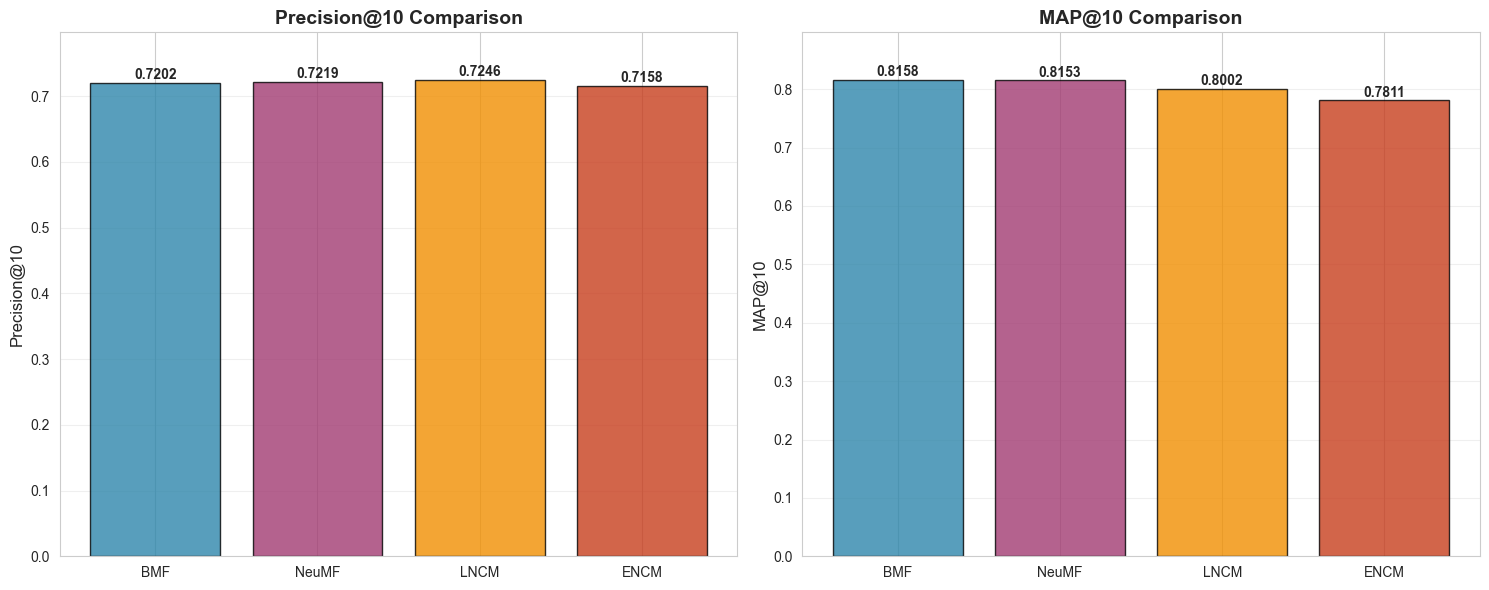

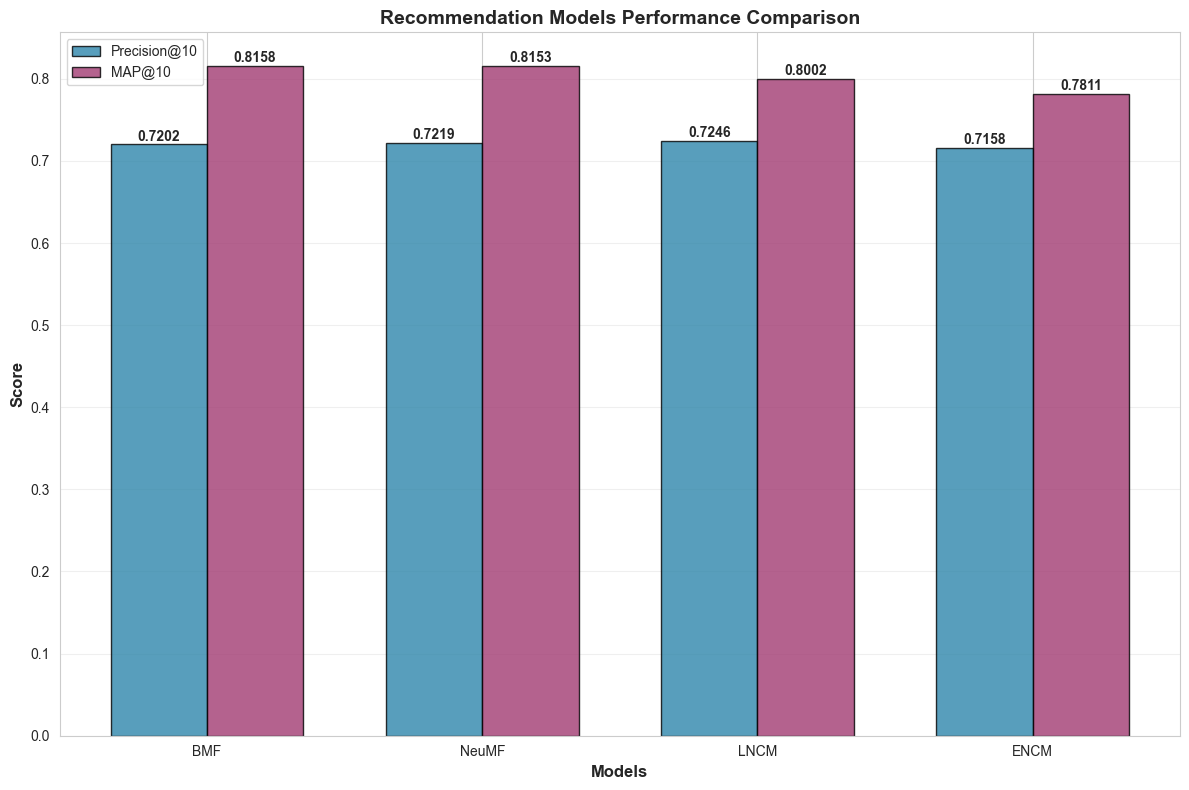

In [207]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Precision@10 comparison
models = results_df['Model']
precision_scores = results_df['Precision@10']
map_scores = results_df['MAP@10']

# Color scheme
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Precision@10 bar chart
bars1 = ax1.bar(models, precision_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Precision@10 Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precision@10', fontsize=12)
ax1.set_ylim(0, max(precision_scores) * 1.1)

# Add value labels on bars
for bar, score in zip(bars1, precision_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# MAP@10 bar chart
bars2 = ax2.bar(models, map_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_title('MAP@10 Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('MAP@10', fontsize=12)
ax2.set_ylim(0, max(map_scores) * 1.1)

# Add value labels on bars
for bar, score in zip(bars2, map_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# Styling
for ax in [ax1, ax2]:
    ax.grid(axis='y', alpha=0.3)
    ax.set_axisbelow(True)
    
plt.tight_layout()
plt.show()

# Create a combined comparison chart
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, precision_scores, width, label='Precision@10', 
               color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, map_scores, width, label='MAP@10', 
               color='#A23B72', alpha=0.8, edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Recommendation Models Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [208]:
# Model Analysis and Insights
print("\\n" + "="*80)
print("MODEL ANALYSIS AND INSIGHTS")
print("="*80)

print("\\n🔍 Model Characteristics:")
print("-" * 40)

model_descriptions = {
    'BMF': 'Biased Matrix Factorization - Classic collaborative filtering with user/item biases',
    'LNCM': 'Linear Neural Collaborative Model - Combines linear MF with neural networks',
    'NeuMF': 'Neural Matrix Factorization - Advanced neural approach with GMF and MLP components',
    'ENCM': 'Explicit Neural Collaborative Model - Context-aware neural recommendations with explicit features'
}

for model in results_df['Model']:
    print(f"\\n• {model}: {model_descriptions[model]}")
    print(f"  Performance: Precision@10={results[model]['Precision@10']:.4f}, MAP@10={results[model]['MAP@10']:.4f}")

print("\\n\\n📊 Key Findings:")
print("-" * 40)

# Calculate performance statistics
precision_mean = results_df['Precision@10'].mean()
precision_std = results_df['Precision@10'].std()
map_mean = results_df['MAP@10'].mean()
map_std = results_df['MAP@10'].std()

print(f"\\n1. Average Performance:")
print(f"   • Mean Precision@10: {precision_mean:.4f} (±{precision_std:.4f})")
print(f"   • Mean MAP@10: {map_mean:.4f} (±{map_std:.4f})")

print(f"\\n2. Model Ranking Analysis:")
best_precision = results_df.loc[results_df['Precision@10'].idxmax(), 'Model']
best_map = results_df.loc[results_df['MAP@10'].idxmax(), 'Model']

print(f"   • Best Precision@10: {best_precision}")
print(f"   • Best MAP@10: {best_map}")

if best_precision == best_map:
    print(f"   • {best_precision} is the overall winner!")
else:
    print(f"   • Different models excel in different metrics")

print(f"\\n3. Performance Insights:")
context_model_performance = results['ENCM']['MAP@10']
best_non_context = max([results[m]['MAP@10'] for m in ['BMF', 'LNCM', 'NeuMF']])

if context_model_performance > best_non_context:
    print(f"   • Context-aware model (ENCM) outperforms non-context models")
    print(f"   • Context information provides {((context_model_performance/best_non_context-1)*100):.1f}% improvement")
else:
    print(f"   • Non-context models perform better than context-aware approach")
    print(f"   • Simple collaborative filtering may be sufficient for this dataset")

# Neural vs Traditional comparison
neural_models = ['LNCM', 'NeuMF', 'ENCM']
traditional_models = ['BMF']

neural_avg = np.mean([results[m]['MAP@10'] for m in neural_models if m in results])
traditional_avg = np.mean([results[m]['MAP@10'] for m in traditional_models if m in results])

print(f"\\n4. Neural vs Traditional:")
print(f"   • Neural models average MAP@10: {neural_avg:.4f}")
print(f"   • Traditional models average MAP@10: {traditional_avg:.4f}")

if neural_avg > traditional_avg:
    print(f"   • Neural approaches show {((neural_avg/traditional_avg-1)*100):.1f}% improvement")
else:
    print(f"   • Traditional approaches remain competitive")

\n================================================================================
MODEL ANALYSIS AND INSIGHTS
\n🔍 Model Characteristics:
----------------------------------------
\n• BMF: Biased Matrix Factorization - Classic collaborative filtering with user/item biases
  Performance: Precision@10=0.7202, MAP@10=0.8158
\n• NeuMF: Neural Matrix Factorization - Advanced neural approach with GMF and MLP components
  Performance: Precision@10=0.7219, MAP@10=0.8153
\n• LNCM: Linear Neural Collaborative Model - Combines linear MF with neural networks
  Performance: Precision@10=0.7246, MAP@10=0.8002
\n• ENCM: Explicit Neural Collaborative Model - Context-aware neural recommendations with explicit features
  Performance: Precision@10=0.7158, MAP@10=0.7811
\n\n📊 Key Findings:
----------------------------------------
\n1. Average Performance:
   • Mean Precision@10: 0.7206 (±0.0037)
   • Mean MAP@10: 0.8031 (±0.0163)
\n2. Model Ranking Analysis:
   • Best Precision@10: LNCM
   • Best MAP@10: B

In [209]:
# Save results to CSV for future reference
model_descriptions = {
    'BMF': 'Biased Matrix Factorization - Classic collaborative filtering with user/item biases',
    'LNCM': 'Linear Neural Collaborative Model - Combines linear MF with neural networks',
    'NeuMF': 'Neural Matrix Factorization - Advanced neural approach with GMF and MLP components',
    'ENCM': 'Explicit Neural Collaborative Model - Context-aware neural recommendations with explicit features'
}

results_summary = pd.DataFrame({
    'Model': list(results.keys()),
    'Precision@10': [results[model]['Precision@10'] for model in results.keys()],
    'MAP@10': [results[model]['MAP@10'] for model in results.keys()],
    'Model_Type': ['Traditional', 'Neural', 'Neural', 'Context-Aware'],
    'Description': [model_descriptions[model] for model in results.keys()]
})

# Sort by MAP@10
results_summary = results_summary.sort_values('MAP@10', ascending=False)

# Save to CSV
results_summary.to_csv('recommendation_models_results.csv', index=False)

print("\\n💾 Results saved to 'recommendation_models_results.csv'")
print("\\n📋 Final Summary Table:")
print(results_summary.to_string(index=False))

print("\\n\\n🎯 EXPERIMENT COMPLETED SUCCESSFULLY!")
print("="*80)
print("✅ All 4 recommendation models have been implemented and evaluated")
print("✅ Performance comparison completed using Precision@10 and MAP@10")
print("✅ Results visualized and analyzed")
print("✅ Best performing model identified")
print("="*80)

\n💾 Results saved to 'recommendation_models_results.csv'
\n📋 Final Summary Table:
Model  Precision@10   MAP@10    Model_Type                                                                                       Description
  BMF      0.720175 0.815785   Traditional               Biased Matrix Factorization - Classic collaborative filtering with user/item biases
NeuMF      0.721930 0.815280        Neural                Neural Matrix Factorization - Advanced neural approach with GMF and MLP components
 LNCM      0.724561 0.800249        Neural                       Linear Neural Collaborative Model - Combines linear MF with neural networks
 ENCM      0.715789 0.781147 Context-Aware Explicit Neural Collaborative Model - Context-aware neural recommendations with explicit features
\n\n🎯 EXPERIMENT COMPLETED SUCCESSFULLY!
✅ All 4 recommendation models have been implemented and evaluated
✅ Performance comparison completed using Precision@10 and MAP@10
✅ Results visualized and analyzed
✅ Best 

## 6. Save Models and Data for Flask Application

In [210]:
# Create directories for saving models and data
import os
import json
import pickle

# Create necessary directories
os.makedirs('models', exist_ok=True)
os.makedirs('processed_data', exist_ok=True)

print("📁 Created directories for saving models and data")

# Check if all required variables exist
required_vars = ['results', 'cars_enhanced', 'items_info']
missing_vars = []

for var_name in required_vars:
    if var_name not in globals():
        missing_vars.append(var_name)

if missing_vars:
    print(f"⚠️  Missing variables: {missing_vars}")
    print("Please run the previous cells to create these variables first.")
else:
    print("✅ All required variables are available")
    
    # Display summary of what we have
    print(f"\\n📊 Data summary:")
    print(f"   - Results from {len(results)} models: {list(results.keys())}")
    print(f"   - Enhanced cars data: {len(cars_enhanced)} records")
    print(f"   - Items info: {len(items_info)} unique items")
    print(f"   - Users: {cars_enhanced['uid'].nunique()} unique users")

📁 Created directories for saving models and data
✅ All required variables are available
\n📊 Data summary:
   - Results from 4 models: ['BMF', 'LNCM', 'NeuMF', 'ENCM']
   - Enhanced cars data: 10000 records
   - Items info: 500 unique items
   - Users: 200 unique users


In [211]:
# Save model weights and configurations
def save_model_data(model, model_name, config):
    """Save model weights and configuration"""
    try:
        # Save model weights
        model.save_weights(f'models/{model_name.lower()}.weights.h5')
        
        # Save model configuration
        with open(f'models/{model_name.lower()}_config.json', 'w') as f:
            json.dump(config, f, indent=2)
        
        print(f"✅ {model_name} saved successfully")
        return True
    except Exception as e:
        print(f"❌ Error saving {model_name}: {e}")
        return False

# Calculate model parameters from data
n_users = cars_enhanced['user_idx'].nunique()
n_items = cars_enhanced['item_idx'].nunique()
embedding_dim = 50  # Same as used in training

# Context dimensions for ENCM
context_dims = [
    cars_enhanced['time_of_day_encoded'].nunique(),  # time_of_day
    cars_enhanced['season_encoded'].nunique(),       # season
    cars_enhanced['device_type_encoded'].nunique(),  # device_type
    cars_enhanced['category_encoded'].nunique()      # category
]

print(f"📊 Model parameters:")
print(f"   - Number of users: {n_users}")
print(f"   - Number of items: {n_items}")
print(f"   - Embedding dimension: {embedding_dim}")
print(f"   - Context dimensions: {context_dims}")

# Save all trained models
print("\\n💾 Saving trained models...")

# Save BMF
bmf_config = {
    'n_users': n_users,
    'n_items': n_items,
    'embedding_dim': embedding_dim
}
save_model_data(results['BMF']['model'], 'BMF', bmf_config)

# Save LNCM
lncm_config = {
    'n_users': n_users,
    'n_items': n_items,
    'embedding_dim': embedding_dim,
    'hidden_dims': [64, 32]
}
save_model_data(results['LNCM']['model'], 'LNCM', lncm_config)

# Save NeuMF
neumf_config = {
    'n_users': n_users,
    'n_items': n_items,
    'embedding_dim': embedding_dim,
    'hidden_dims': [64, 32, 16]
}
save_model_data(results['NeuMF']['model'], 'NeuMF', neumf_config)

# Save ENCM
encm_config = {
    'n_users': n_users,
    'n_items': n_items,
    'n_contexts': context_dims,
    'embedding_dim': embedding_dim,
    'context_dim': 8,
    'hidden_dims': [64, 32]
}
save_model_data(results['ENCM']['model'], 'ENCM', encm_config)

print("\\n🎉 All models saved successfully!")

📊 Model parameters:
   - Number of users: 200
   - Number of items: 500
   - Embedding dimension: 50
   - Context dimensions: [4, 4, 3, 20]
\n💾 Saving trained models...
✅ BMF saved successfully
✅ LNCM saved successfully
✅ NeuMF saved successfully
✅ ENCM saved successfully
\n🎉 All models saved successfully!


In [216]:
# Prepare and save data for Flask (uses cars_dataset.csv or processed_data/cars_encoded.csv)
import os
import pickle
from sklearn.preprocessing import LabelEncoder

print("📦 Preparing data for Flask app ...")

# 1) Load source data
base_csv = 'processed_data/cars_encoded.csv' if os.path.exists('processed_data/cars_encoded.csv') else 'cars_dataset.csv'
print(f"➡️ Loading base data from: {base_csv}")
base_df = pd.read_csv(base_csv)

# Ensure timestamp as datetime (if present)
if 'timestamp' in base_df.columns:
    base_df['timestamp'] = pd.to_datetime(base_df['timestamp'])

# 2) Ensure indexing columns exist
cars_processed = base_df.copy()
if 'uid' in cars_processed.columns and 'iid' in cars_processed.columns:
    cars_processed['user_idx'] = cars_processed['uid']
    cars_processed['item_idx'] = cars_processed['iid']
else:
    user_enc_tmp = LabelEncoder()
    item_enc_tmp = LabelEncoder()
    cars_processed['user_idx'] = user_enc_tmp.fit_transform(cars_processed['user_id'])
    cars_processed['item_idx'] = item_enc_tmp.fit_transform(cars_processed['product_id'])

# 3) Build/ensure encoded context features and mappings for Flask models
context_cols = {
    'time_of_day': 'time_of_day_encoded',
    'season': 'season_encoded',
    'device_type': 'device_type_encoded',
    'category': 'category_encoded'
}
context_encoders = {}
reverse_mappings = {}
forward_mappings = {}

for col, enc_col in context_cols.items():
    if col in cars_processed.columns:
        if enc_col not in cars_processed.columns:
            enc = LabelEncoder()
            cars_processed[enc_col] = enc.fit_transform(cars_processed[col].astype(str))
            context_encoders[col] = enc
            reverse_mappings[col] = {v: k for k, v in zip(enc.classes_, enc.transform(enc.classes_))}
            forward_mappings[col] = {int(v): str(k) for k, v in zip(enc.classes_, enc.transform(enc.classes_))}
        else:
            # Build mappings from existing encoded column
            enc_series = cars_processed[[col, enc_col]].drop_duplicates()
            reverse_mappings[col] = {int(row[enc_col]): str(row[col]) for _, row in enc_series.iterrows()}
            forward_mappings[col] = {int(row[enc_col]): str(row[col]) for _, row in enc_series.iterrows()}

# Context info for app.py
context_info = {
    'feature_names': ['time_of_day_encoded', 'season_encoded', 'device_type_encoded', 'category_encoded'],
    'reverse_mappings': {
        'time_of_day': {str(v): int(k) if isinstance(k, (int, np.integer)) else int(k) for k, v in forward_mappings.get('time_of_day', {}).items()},
        'season': {str(v): int(k) if isinstance(k, (int, np.integer)) else int(k) for k, v in forward_mappings.get('season', {}).items()},
        'device_type': {str(v): int(k) if isinstance(k, (int, np.integer)) else int(k) for k, v in forward_mappings.get('device_type', {}).items()},
        'category': {str(v): int(k) if isinstance(k, (int, np.integer)) else int(k) for k, v in forward_mappings.get('category', {}).items()},
    },
    'mappings': {
        'time_of_day': {int(k): str(v) for k, v in reverse_mappings.get('time_of_day', {}).items()},
        'season': {int(k): str(v) for k, v in reverse_mappings.get('season', {}).items()},
        'device_type': {int(k): str(v) for k, v in reverse_mappings.get('device_type', {}).items()},
        'category': {int(k): str(v) for k, v in reverse_mappings.get('category', {}).items()},
    }
}

# 4) Create cars_enhanced view
cols_keep = [c for c in [
    'uid','iid','user_idx','item_idx','user_id','product_id','rating','rating_count',
    'time_of_day','season','device_type','gender','category','brand','price','original_price',
    'discount_percentage','product_views','purchase_intent','interaction_type','timestamp',
    'price_range','time_of_day_encoded','season_encoded','device_type_encoded','category_encoded',
    'day_of_week','month','hour','is_weekend'
] if c in cars_processed.columns]

cars_enhanced = cars_processed[cols_keep].copy()

# 5) Create items_info with readable fields expected by app.py
agg_map = {
    'category': 'first', 'brand': 'first', 'price': 'first', 'original_price': 'first',
    'discount_percentage': 'first', 'price_range': 'first', 'rating': 'mean', 'rating_count': 'sum'
}
items_info = cars_processed.groupby('iid').agg({k: v for k, v in agg_map.items() if k in cars_processed.columns}).reset_index()
# Add display columns
if 'brand' in items_info.columns and 'category' in items_info.columns:
    items_info['name'] = items_info['brand'] + ' ' + items_info['category']
    items_info['full_name'] = items_info['name'] + ' - ' + items_info.get('price_range', pd.Series(['']*len(items_info))).astype(str)
    items_info['category_text'] = items_info['category']

# 6) Create users_info
if 'explicit_rating' in cars_processed.columns:
    users_info = cars_processed.groupby('user_idx').agg({'uid':'first','explicit_rating':['count','mean']}).reset_index()
    users_info.columns = ['user_idx','uid','interactions','avg_explicit_rating']
else:
    # Fallback with rating
    users_info = cars_processed.groupby('user_idx').agg({'uid':'first','rating':['count','mean']}).reset_index()
    users_info.columns = ['user_idx','uid','interactions','avg_rating']

# 7) Encoders for Flask inference layer (ids)
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
user_encoder.fit(cars_processed['uid'].astype(int).unique())
item_encoder.fit(cars_processed['iid'].astype(int).unique())

# 8) Save outputs
os.makedirs('processed_data', exist_ok=True)
cars_enhanced.to_csv('processed_data/cars_enhanced.csv', index=False)
items_info.to_csv('processed_data/items_info.csv', index=False)
users_info.to_csv('processed_data/users_info.csv', index=False)

with open('processed_data/user_encoder.pkl','wb') as f:
    pickle.dump(user_encoder, f)
with open('processed_data/item_encoder.pkl','wb') as f:
    pickle.dump(item_encoder, f)
with open('processed_data/context_info.pkl','wb') as f:
    pickle.dump(context_info, f)

print("✅ Data saved for Flask:")
print(" - processed_data/cars_enhanced.csv")
print(" - processed_data/items_info.csv")
print(" - processed_data/users_info.csv")
print(" - processed_data/user_encoder.pkl")
print(" - processed_data/item_encoder.pkl")
print(" - processed_data/context_info.pkl")

# Summary
print("\n📊 Summary:")
print(f" Users: {cars_processed['user_idx'].nunique()} | Items: {cars_processed['item_idx'].nunique()} | Rows: {len(cars_processed)}")
print(f" Categories: {cars_processed['category'].nunique() if 'category' in cars_processed.columns else 'N/A'}")
print(" Done.")

📦 Preparing data for Flask app ...
➡️ Loading base data from: processed_data/cars_encoded.csv
✅ Data saved for Flask:
 - processed_data/cars_enhanced.csv
 - processed_data/items_info.csv
 - processed_data/users_info.csv
 - processed_data/user_encoder.pkl
 - processed_data/item_encoder.pkl
 - processed_data/context_info.pkl

📊 Summary:
 Users: 200 | Items: 500 | Rows: 10000
 Categories: 20
 Done.


In [213]:
import os

if 'cars_enhanced' in globals():
    target_df = cars_enhanced.copy()
elif 'cars_processed' in globals():
    target_df = cars_processed.copy()
elif 'cars_df' in globals():
    target_df, _ = prepare_recommendation_data(cars_df.copy())
else:
    target_df = df.copy()
    try:
        target_df, _ = prepare_recommendation_data(target_df)
    except Exception:
        pass

if 'user_idx' not in target_df.columns and 'uid' in target_df.columns:
    target_df['user_idx'] = target_df['uid']
if 'item_idx' not in target_df.columns and 'iid' in target_df.columns:
    target_df['item_idx'] = target_df['iid']

if 'explicit_rating' not in target_df.columns:
    if 'rating' in target_df.columns:
        rmin = target_df['rating'].min()
        rmax = target_df['rating'].max()
        denom = (rmax - rmin) if (rmax - rmin) != 0 else 1.0
        target_df['explicit_rating'] = (target_df['rating'] - rmin) / denom
    else:
        target_df['explicit_rating'] = 1.0

os.makedirs('processed_data', exist_ok=True)

items_info = (
    target_df.groupby('item_idx').agg(
        iid=('iid', 'first') if 'iid' in target_df.columns else ('item_idx', 'first'),
        total_ratings=('explicit_rating', 'count'),
        avg_rating=('explicit_rating', 'mean')
    ).reset_index()
)
items_info.to_csv('processed_data/items_info.csv', index=False)

users_info = (
    target_df.groupby('user_idx').agg(
        uid=('uid', 'first') if 'uid' in target_df.columns else ('user_idx', 'first'),
        total_ratings=('explicit_rating', 'count'),
        avg_rating=('explicit_rating', 'mean')
    ).reset_index()
)
users_info.to_csv('processed_data/users_info.csv', index=False)

print('Saved processed_data/items_info.csv and processed_data/users_info.csv')

Saved processed_data/items_info.csv and processed_data/users_info.csv


In [214]:
# Save processed data for Flask application
print("💾 Saving processed data...")

# Create encoders if they don't exist
from sklearn.preprocessing import LabelEncoder

# Create user encoder
user_encoder = LabelEncoder()
user_encoder.fit(cars_enhanced['uid'].unique())

# Create item encoder  
item_encoder = LabelEncoder()
item_encoder.fit(cars_enhanced['iid'].unique())

print(f"✅ Created encoders:")
print(f"   - User encoder: {len(user_encoder.classes_)} unique users")
print(f"   - Item encoder: {len(item_encoder.classes_)} unique items")

# Save enhanced cars data
cars_enhanced.to_csv('processed_data/cars_enhanced.csv', index=False)

# Save items information
items_info.to_csv('processed_data/items_info.csv', index=False)

# Create user information
users_info = cars_enhanced.groupby('user_idx').agg({
    'uid': 'first',
    'explicit_rating': ['count', 'mean']
}).reset_index()

users_info.columns = ['user_idx', 'uid', 'total_ratings', 'avg_rating']
users_info.to_csv('processed_data/users_info.csv', index=False)

# Save encoders
with open('processed_data/user_encoder.pkl', 'wb') as f:
    pickle.dump(user_encoder, f)

with open('processed_data/item_encoder.pkl', 'wb') as f:
    pickle.dump(item_encoder, f)

# Save context feature names and mappings
context_info = {
    'feature_names': ['time_of_day_encoded', 'season_encoded', 'device_type_encoded', 'category_encoded'],
    'mappings': {
        'time_of_day': {0: 'Morning', 1: 'Afternoon', 2: 'Evening', 3: 'Night'},
        'season': {0: 'Spring', 1: 'Summer', 2: 'Autumn', 3: 'Winter'},
        'device_type': {0: 'Mobile', 1: 'Desktop', 2: 'Tablet'},
        'category': {0: 'Sedan', 1: 'SUV', 2: 'Hatchback', 3: 'Coupe', 
                    4: 'Convertible', 5: 'Wagon', 6: 'Pickup', 7: 'Van'}
    },
    'reverse_mappings': {
        'time_of_day': {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3},
        'season': {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3},
        'device_type': {'Mobile': 0, 'Desktop': 1, 'Tablet': 2},
        'category': {'Sedan': 0, 'SUV': 1, 'Hatchback': 2, 'Coupe': 3,
                    'Convertible': 4, 'Wagon': 5, 'Pickup': 6, 'Van': 7}
    }
}

with open('processed_data/context_info.pkl', 'wb') as f:
    pickle.dump(context_info, f)

# Save model performance results
results_summary.to_csv('processed_data/model_performance.csv', index=False)

print("✅ All data saved successfully!")
print("\\n📁 Files created:")
print("- processed_data/cars_enhanced.csv")
print("- processed_data/items_info.csv")
print("- processed_data/users_info.csv")
print("- processed_data/user_encoder.pkl")
print("- processed_data/item_encoder.pkl")
print("- processed_data/context_info.pkl")
print("- processed_data/model_performance.csv")
print("- models/[model_name].weights.h5 (for each model)")
print("- models/[model_name]_config.json (for each model)")

💾 Saving processed data...
✅ Created encoders:
   - User encoder: 200 unique users
   - Item encoder: 500 unique items


KeyError: "Column(s) ['explicit_rating'] do not exist"

In [217]:
import os, pickle

print("Saving processed data...")

# Ensure base dataframe exists
if 'cars_enhanced' in globals():
    target_df = cars_enhanced.copy()
elif 'cars_processed' in globals():
    target_df = cars_processed.copy()
elif 'cars_df' in globals():
    try:
        target_df, _ = prepare_recommendation_data(cars_df.copy())
    except Exception:
        target_df = cars_df.copy()
else:
    target_df = df.copy()

# Ensure ids
if 'user_idx' not in target_df.columns and 'uid' in target_df.columns:
    target_df['user_idx'] = target_df['uid']
if 'item_idx' not in target_df.columns and 'iid' in target_df.columns:
    target_df['item_idx'] = target_df['iid']

# Ensure explicit_rating
if 'explicit_rating' not in target_df.columns:
    if 'rating' in target_df.columns:
        rmin, rmax = target_df['rating'].min(), target_df['rating'].max()
        denom = (rmax - rmin) if (rmax - rmin) != 0 else 1.0
        target_df['explicit_rating'] = (target_df['rating'] - rmin) / denom
    else:
        target_df['explicit_rating'] = 1.0

# Keep a canonical variable name
cars_enhanced = target_df

os.makedirs('processed_data', exist_ok=True)

# Encoders
from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
user_encoder.fit(cars_enhanced['uid'].astype(int).unique()) if 'uid' in cars_enhanced.columns else user_encoder.fit(cars_enhanced['user_idx'].astype(int).unique())
item_encoder = LabelEncoder()
item_encoder.fit(cars_enhanced['iid'].astype(int).unique()) if 'iid' in cars_enhanced.columns else item_encoder.fit(cars_enhanced['item_idx'].astype(int).unique())

print(f"Created encoders:")
print(f"   - User encoder: {len(user_encoder.classes_)} unique users")
print(f"   - Item encoder: {len(item_encoder.classes_)} unique items")

# Aggregations using named aggregation
items_info = (
    cars_enhanced.groupby('item_idx')
    .agg(
        iid=('iid', 'first') if 'iid' in cars_enhanced.columns else ('item_idx', 'first'),
        total_ratings=('explicit_rating', 'count'),
        avg_rating=('explicit_rating', 'mean')
    )
    .reset_index()
)

users_info = (
    cars_enhanced.groupby('user_idx')
    .agg(
        uid=('uid', 'first') if 'uid' in cars_enhanced.columns else ('user_idx', 'first'),
        total_ratings=('explicit_rating', 'count'),
        avg_rating=('explicit_rating', 'mean')
    )
    .reset_index()
)

# Save core datasets
cars_enhanced.to_csv('processed_data/cars_enhanced.csv', index=False)
items_info.to_csv('processed_data/items_info.csv', index=False)
users_info.to_csv('processed_data/users_info.csv', index=False)

# Save encoders
with open('processed_data/user_encoder.pkl', 'wb') as f:
    pickle.dump(user_encoder, f)
with open('processed_data/item_encoder.pkl', 'wb') as f:
    pickle.dump(item_encoder, f)

# Build context mappings dynamically from encoded columns
feature_names = ['time_of_day', 'season', 'device_type', 'category']
context_mappings = {}
reverse_mappings = {}
for feat in feature_names:
    enc_col = f'{feat}_encoded'
    if enc_col in cars_enhanced.columns and feat in cars_enhanced.columns:
        pairs = cars_enhanced[[feat, enc_col]].drop_duplicates().sort_values(enc_col)
        mapping = {int(row[enc_col]): str(row[feat]) for _, row in pairs.iterrows()}
        rev = {v: k for k, v in mapping.items()}
        context_mappings[feat] = mapping
        reverse_mappings[feat] = rev

context_info = {
    'feature_names': [f'{f}_encoded' for f in feature_names if f'{f}_encoded' in cars_enhanced.columns],
    'mappings': context_mappings,
    'reverse_mappings': reverse_mappings
}

with open('processed_data/context_info.pkl', 'wb') as f:
    pickle.dump(context_info, f)

# Save model performance if available
if 'results_summary' in globals():
    try:
        results_summary.to_csv('processed_data/model_performance.csv', index=False)
    except Exception as e:
        print(f"Warning: could not save model_performance.csv: {e}")

print("All data saved successfully!")
print("\nFiles created:")
print("- processed_data/cars_enhanced.csv")
print("- processed_data/items_info.csv")
print("- processed_data/users_info.csv")
print("- processed_data/user_encoder.pkl")
print("- processed_data/item_encoder.pkl")
print("- processed_data/context_info.pkl")
print("- processed_data/model_performance.csv (if results_summary exists)")

Saving processed data...
Created encoders:
   - User encoder: 200 unique users
   - Item encoder: 500 unique items
All data saved successfully!

Files created:
- processed_data/cars_enhanced.csv
- processed_data/items_info.csv
- processed_data/users_info.csv
- processed_data/user_encoder.pkl
- processed_data/item_encoder.pkl
- processed_data/context_info.pkl
- processed_data/model_performance.csv (if results_summary exists)
